# 1. Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [3]:
from datetime import datetime, timedelta

In [4]:
import yfinance as yf

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
start = datetime(2018,1,1)
end = datetime(2023, 11, 23)

In [7]:
google = yf.Ticker('GOOG')
msft=yf.Ticker('MSFT')

In [8]:
google_df = google.history(start=start, end=end)
msft_df = msft.history(start=start, end=end)

In [9]:
google_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-02 00:00:00-05:00,52.417000,53.347000,52.261501,53.250000,24752000,0.0,0.0
2018-01-03 00:00:00-05:00,53.215500,54.314499,53.160500,54.124001,28604000,0.0,0.0
2018-01-04 00:00:00-05:00,54.400002,54.678501,54.200100,54.320000,20092000,0.0,0.0
2018-01-05 00:00:00-05:00,54.700001,55.212502,54.599998,55.111500,25582000,0.0,0.0
2018-01-08 00:00:00-05:00,55.111500,55.563499,55.081001,55.347000,20952000,0.0,0.0


In [10]:
msft_df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-11-16 00:00:00-05:00,370.959991,376.350006,370.179993,376.170013,27182300,0.0,0.0
2023-11-17 00:00:00-05:00,373.609985,374.369995,367.000000,369.850006,40157000,0.0,0.0
2023-11-20 00:00:00-05:00,371.220001,378.869995,371.000000,377.440002,52465100,0.0,0.0
2023-11-21 00:00:00-05:00,375.670013,376.220001,371.119995,373.070007,28423100,0.0,0.0
2023-11-22 00:00:00-05:00,378.000000,379.790009,374.970001,377.850006,23345300,0.0,0.0


In [11]:
google_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1484 entries, 2018-01-02 00:00:00-05:00 to 2023-11-22 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1484 non-null   float64
 1   High          1484 non-null   float64
 2   Low           1484 non-null   float64
 3   Close         1484 non-null   float64
 4   Volume        1484 non-null   int64  
 5   Dividends     1484 non-null   float64
 6   Stock Splits  1484 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 92.8 KB


In [12]:
msft_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1484 entries, 2018-01-02 00:00:00-05:00 to 2023-11-22 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1484 non-null   float64
 1   High          1484 non-null   float64
 2   Low           1484 non-null   float64
 3   Close         1484 non-null   float64
 4   Volume        1484 non-null   int64  
 5   Dividends     1484 non-null   float64
 6   Stock Splits  1484 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 92.8 KB


# 2. Pre-processing

In [13]:
# 选择闭市价
g_returns = 100 * google_df[['Close']].pct_change().dropna() 
ms_returns = 100 * msft_df[['Close']].pct_change().dropna() 

Text(0.5, 1.0, ' Google Percentage Return')

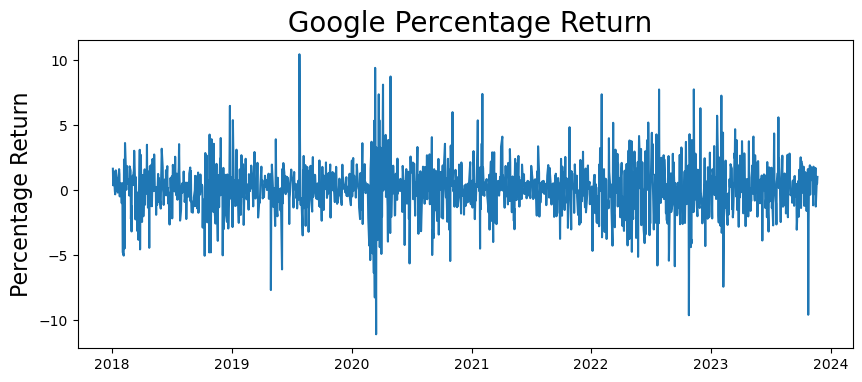

In [14]:
plt.figure(figsize=(10,4))
plt.plot(g_returns)
plt.ylabel('Percentage Return', fontsize=16)
plt.title(' Google Percentage Return', fontsize=20)

Text(0.5, 1.0, ' MicroSoft Percentage Return')

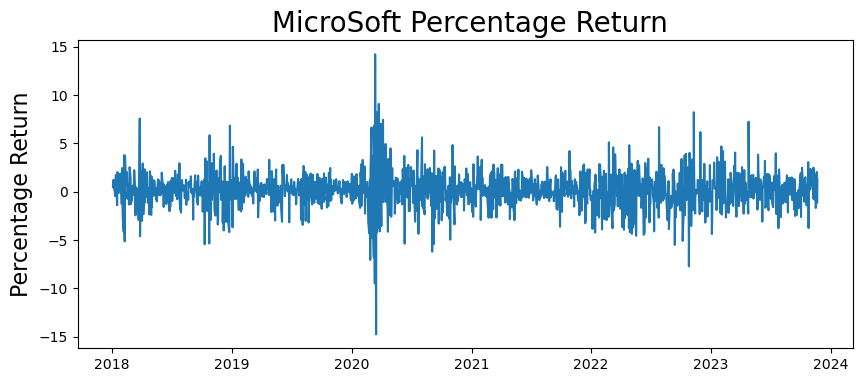

In [15]:
plt.figure(figsize=(10,4))
plt.plot(ms_returns)
plt.ylabel('Percentage Return', fontsize=16)
plt.title(' MicroSoft Percentage Return', fontsize=20)

## Stationarity Check

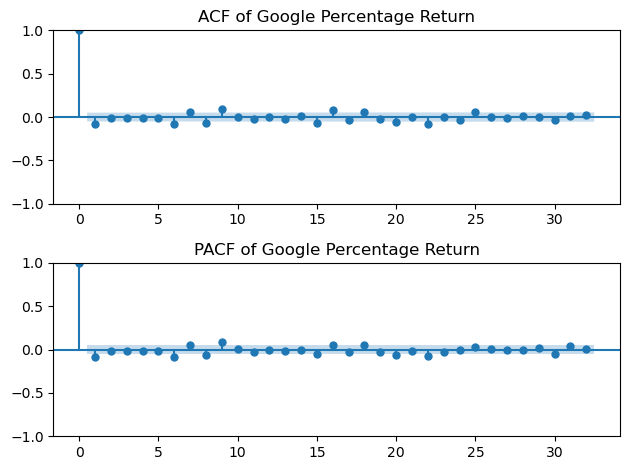

In [16]:
fig, axs = plt.subplots(2)

plot_acf(g_returns, ax=axs[0])
axs[0].set_title('ACF of Google Percentage Return')
plot_pacf(g_returns, ax=axs[1])
axs[1].set_title('PACF of Google Percentage Return')

plt.tight_layout()
plt.show()

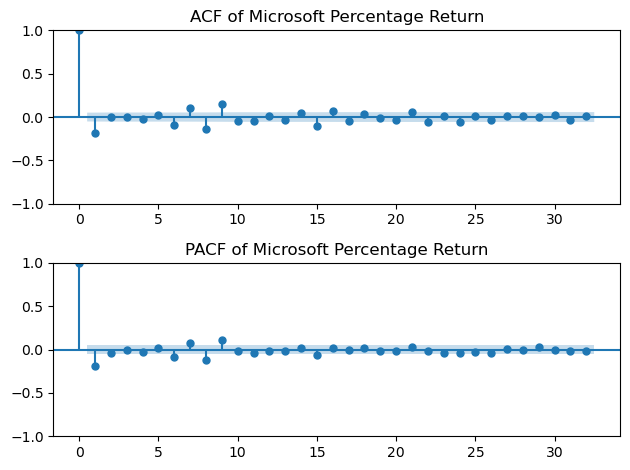

In [17]:
fig, axs = plt.subplots(2)

plot_acf(ms_returns, ax=axs[0])
axs[0].set_title('ACF of Microsoft Percentage Return')
plot_pacf(ms_returns, ax=axs[1])
axs[1].set_title('PACF of Microsoft Percentage Return')

plt.tight_layout()
plt.show()

### Decomposition

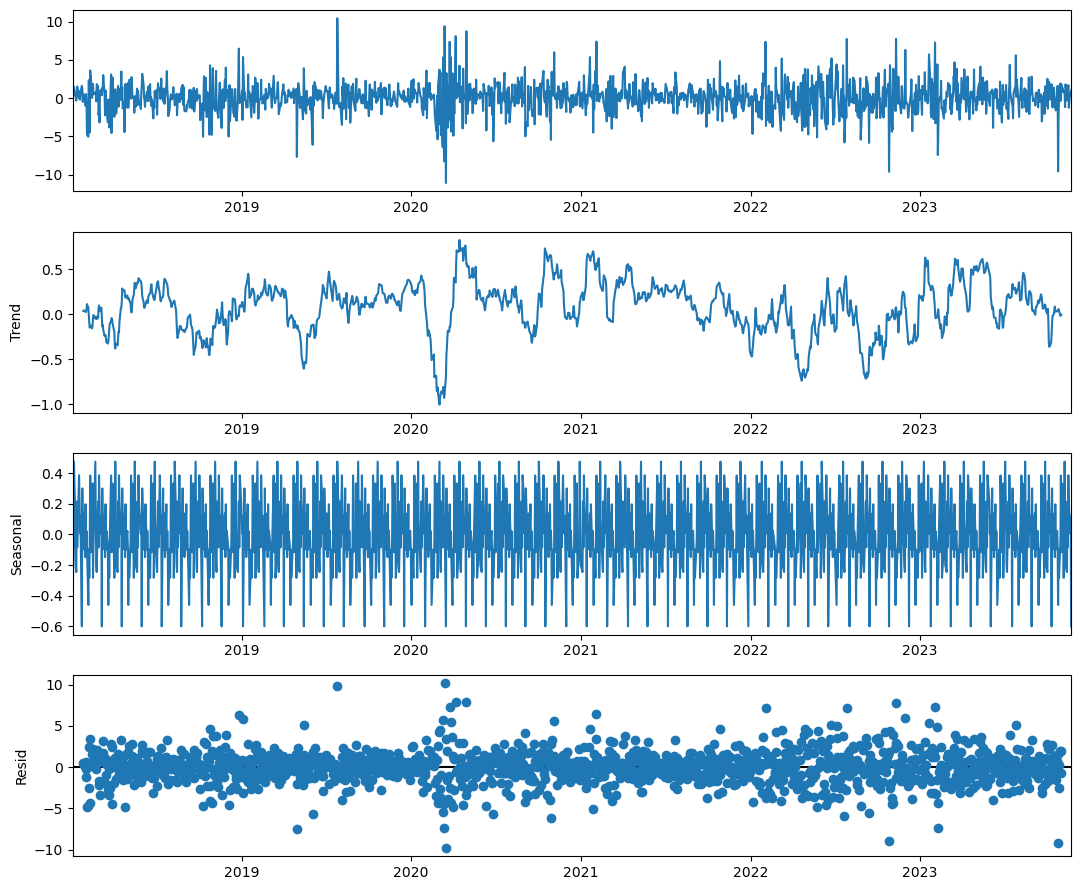

In [18]:
from pylab import rcParams

# Google

rcParams['figure.figsize'] = 11, 9
decomposed = sm.tsa.seasonal_decompose(g_returns,period=30) # Check whether there exists monthly seasonality
figure = decomposed.plot() 
plt.show()

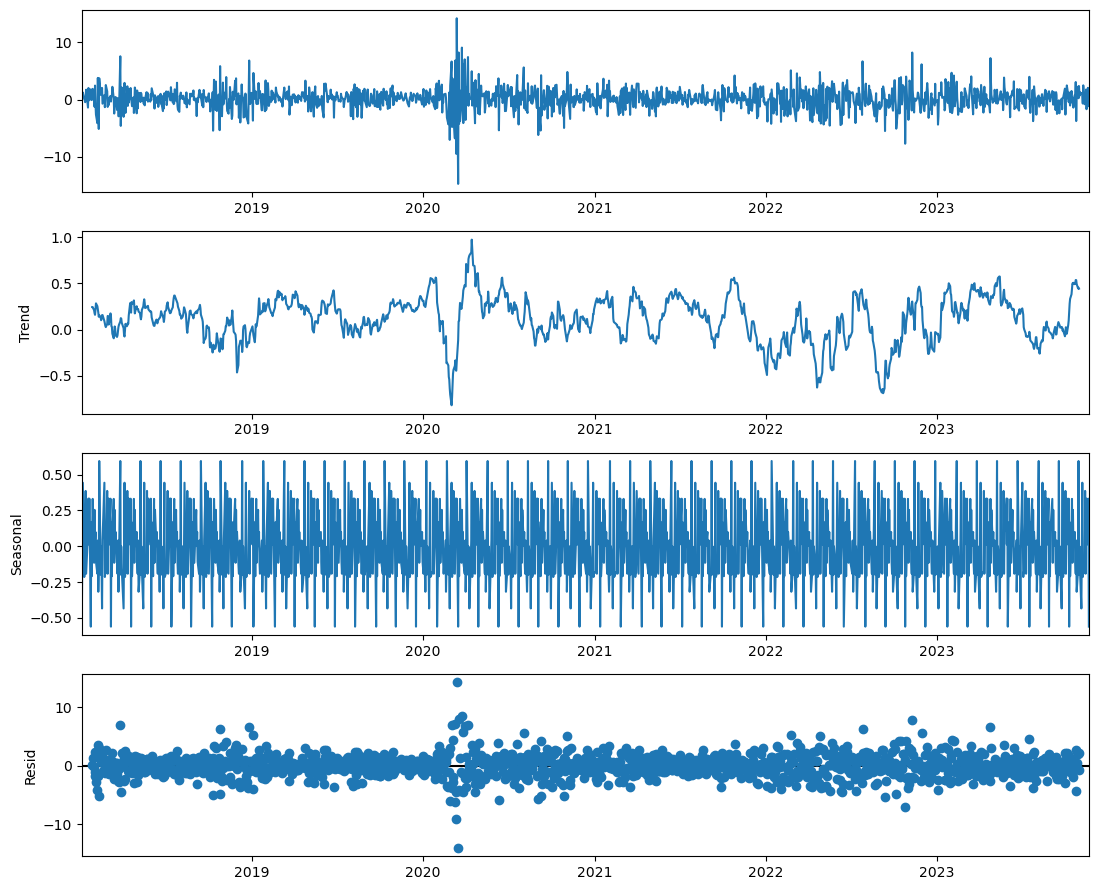

In [19]:
# Microsoft
rcParams['figure.figsize'] = 11, 9
decomposed = sm.tsa.seasonal_decompose(ms_returns,period=30) # Check whether there exists monthly seasonality
figure = decomposed.plot() 
plt.show()

### The Augmented Dickey-Fuller test

In [20]:
from statsmodels.tsa.stattools import adfuller

goo_adftest = adfuller(g_returns)
goo_adf_results= pd.Series(goo_adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in goo_adftest[4].items():
    goo_adf_results['Critical Value (%s)'%key] = value
goo_adf_results

Test Statistic                -9.414402e+00
p-value                        5.720638e-16
#Lags Used                     2.100000e+01
Number of Observations Used    1.461000e+03
Critical Value (1%)           -3.434834e+00
Critical Value (5%)           -2.863520e+00
Critical Value (10%)          -2.567824e+00
dtype: float64

In [21]:
# As the p-value is less than 0.05, so reject the null hypothesis. Thus, the data is stationary.

In [22]:
msft_adftest = adfuller(ms_returns)
msft_adf_results= pd.Series(msft_adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in msft_adftest[4].items():
    msft_adf_results['Critical Value (%s)'%key] = value
msft_adf_results

Test Statistic                -1.291611e+01
p-value                        3.963038e-24
#Lags Used                     8.000000e+00
Number of Observations Used    1.474000e+03
Critical Value (1%)           -3.434794e+00
Critical Value (5%)           -2.863503e+00
Critical Value (10%)          -2.567815e+00
dtype: float64

In [23]:
# As the p-value is less than 0.05, so reject the null hypothesis. Thus, the data is stationary.

## Granger Casuality Check

In [24]:
# As the data is stationary, so we can now conduct Granger Casuality Check

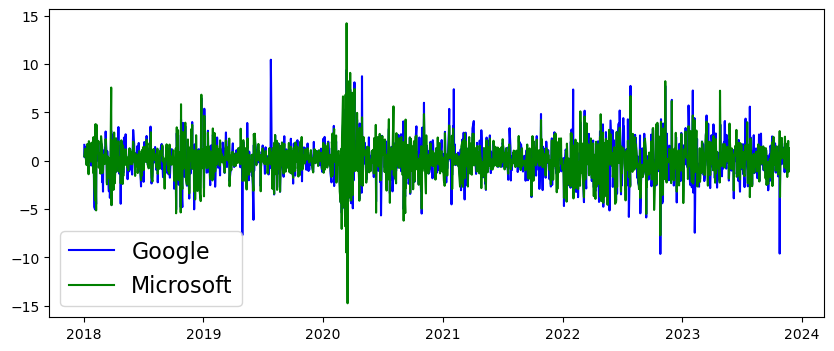

In [25]:
plt.figure(figsize=(10,4))
plt.plot(g_returns, color='b')
plt.plot(ms_returns, color='g')

plt.legend(['Google', 'Microsoft'], fontsize=16)

In [26]:
from statsmodels.tsa.stattools import grangercausalitytests

In [27]:
# Extract the values from dataframes ms_returns and g_returns to get ready for the Granger Casualtiy Check
ms=ms_returns.values
goo=g_returns.values

In [28]:
                                 # 果         因     检查Google的股价是否受microsoft影响（causal）
gc_check = pd.DataFrame(columns=['Google', 'Microsoft'], data=zip(ms,goo))
gc_check.head()

,Google,Microsoft
0,[0.46535782085188604],[1.641315585570724]
1,[0.8801562559898723],[0.362129819522905]
2,[1.2398264879076581],[1.457106215021109]
3,[0.1020497249356378],[0.427316143828782]
4,[-0.06798539633319223],[-0.0614313271785738]


In [29]:
gc_check = gc_check.astype(float)
gc_check.head()

,Google,Microsoft
0,0.465358,1.641316
1,0.880156,0.362130
2,1.239826,1.457106
3,0.102050,0.427316
4,-0.067985,-0.061431


In [30]:
# To determin the number of lags needed for the test

model = VAR(gc_check)
aic=[]
for i in range(30):
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')
    


Lag Order = 0
AIC :  1.768941237948899
BIC :  1.776091369226226
FPE :  5.864640816418516
HQIC:  1.7716064407888443 

Lag Order = 1
AIC :  1.7362047841991537
BIC :  1.7576669210649676
FPE :  5.675761817114811
HQIC:  1.7442050398224196 

Lag Order = 2
AIC :  1.740575119288665
BIC :  1.776364942477509
FPE :  5.70062130967054
HQIC:  1.7539166333350484 

Lag Order = 3
AIC :  1.7382129505995603
BIC :  1.788346168933759
FPE :  5.687171882794722
HQIC:  1.756901940136142 

Lag Order = 4
AIC :  1.7418563571163932
BIC :  1.8063487075753482
FPE :  5.707931264399528
HQIC:  1.7658990506662058 

Lag Order = 5
AIC :  1.7402437604990564
BIC :  1.819111008288758
FPE :  5.698735511693057
HQIC:  1.7696463980698436 

Lag Order = 6
AIC :  1.739106159722402
BIC :  1.8323640983451615
FPE :  5.692258358171815
HQIC:  1.7738749928354702 

Lag Order = 7
AIC :  1.7392998514135867
BIC :  1.8469643027379856
FPE :  5.693363799838009
HQIC:  1.7794411431327475 

Lag Order = 8
AIC :  1.73208882651251
BIC :  1.8541756408

In [31]:
# lag=9时有最小的AIC

In [32]:
gc_res = grangercausalitytests(gc_check, 30) 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0148  , p=0.9031  , df_denom=1479, df_num=1
ssr based chi2 test:   chi2=0.0149  , p=0.9030  , df=1
likelihood ratio test: chi2=0.0149  , p=0.9030  , df=1
parameter F test:         F=0.0148  , p=0.9031  , df_denom=1479, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0073  , p=0.9927  , df_denom=1476, df_num=2
ssr based chi2 test:   chi2=0.0146  , p=0.9927  , df=2
likelihood ratio test: chi2=0.0146  , p=0.9927  , df=2
parameter F test:         F=0.0073  , p=0.9927  , df_denom=1476, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.3462  , p=0.0185  , df_denom=1473, df_num=3
ssr based chi2 test:   chi2=10.0863 , p=0.0178  , df=3
likelihood ratio test: chi2=10.0521 , p=0.0181  , df=3
parameter F test:         F=3.3462  , p=0.0185  , df_denom=1473, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.4461  , p=0.

ssr based F test:         F=1.6393  , p=0.0164  , df_denom=1392, df_num=30
ssr based chi2 test:   chi2=51.3334 , p=0.0090  , df=30
likelihood ratio test: chi2=50.4474 , p=0.0111  , df=30
parameter F test:         F=1.6393  , p=0.0164  , df_denom=1392, df_num=30


# 3. Fit VAR model

In [33]:
data=gc_check

In [34]:
# Train (90%) & Test (10%) Split

nobs = round(0.1*len(data))
train, test = data[0:-nobs], data[-nobs:]

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335 entries, 0 to 1334
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Google     1335 non-null   float64
 1   Microsoft  1335 non-null   float64
dtypes: float64(2)
memory usage: 21.0 KB


In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 1335 to 1482
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Google     148 non-null    float64
 1   Microsoft  148 non-null    float64
dtypes: float64(2)
memory usage: 2.4 KB


In [37]:
# According to AIC check, the explicitly computed AIC is the lowest at lag 9.

data=gc_check
model = VAR(train)
model_fitted = model.fit(9)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 25, Nov, 2023
Time:                     23:06:50
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    1.81507
Nobs:                     1326.00    HQIC:                   1.72209
Log likelihood:          -4829.81    FPE:                    5.29279
AIC:                      1.66634    Det(Omega_mle):         5.14431
--------------------------------------------------------------------
Results for equation Google
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.135835         0.052993            2.563           0.010
L1.Google           -0.190969         0.044869           -4.256           0.000
L1.Microsoft         0.020354         0.043045            0.473

### DW-Test of the residuals

In [38]:
from statsmodels.stats.stattools import durbin_watson

out = durbin_watson(model_fitted.resid)
for col, val in zip(gc_check.columns, out):
    print(col, ':', round(val, 4))


Google : 1.9924
Microsoft : 1.9971


# 4. Forecast

## Simple Forecast

In [39]:
lag_order = model_fitted.k_ar
print(lag_order)

9


In [40]:
forecast_input = train.values[-lag_order:]
forecast_input

array([[ 0.23336122, -0.84809791],
       [ 2.23993126,  2.82265842],
       [-1.27655566,  1.17385767],
       [ 0.92960186, -2.7772711 ],
       [-0.1488879 , -1.22157061],
       [ 0.02775376, -0.09513518],
       [-0.81124757,  0.83794031],
       [-0.12232549,  0.00944489],
       [-1.39628939,  0.82144754]])

In [41]:
# Forecast
fore = model_fitted.forecast(y=forecast_input, steps=nobs)
forecast = pd.DataFrame(fore, index=data.index[-nobs:], columns=data.columns )
forecast

,Google,Microsoft
1335,0.227398,0.180424
1336,0.591379,0.457312
1337,-0.542521,-0.669910
1338,0.270076,0.113682
1339,0.123429,-0.125357
...,...,...
1478,0.111193,0.068268
1479,0.111193,0.068268
1480,0.111193,0.068268
1481,0.111193,0.068268


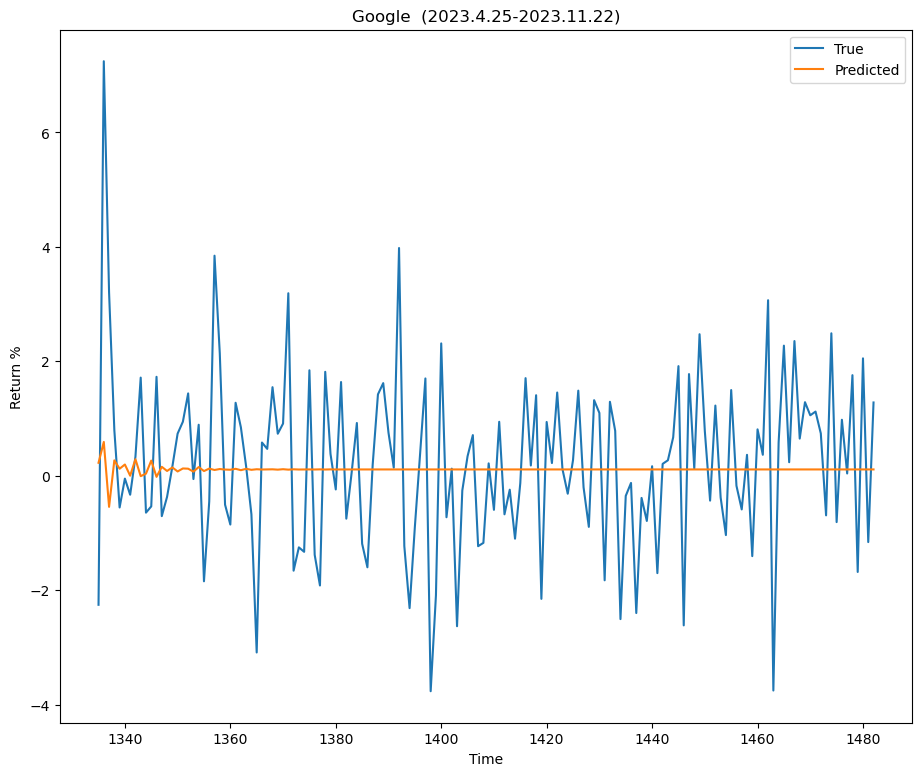

In [42]:
plt.plot(test['Google'], label='True')
plt.plot(forecast['Google'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Return %')
plt.title('Google  (2023.4.25-2023.11.22)')
plt.legend()
plt.show()

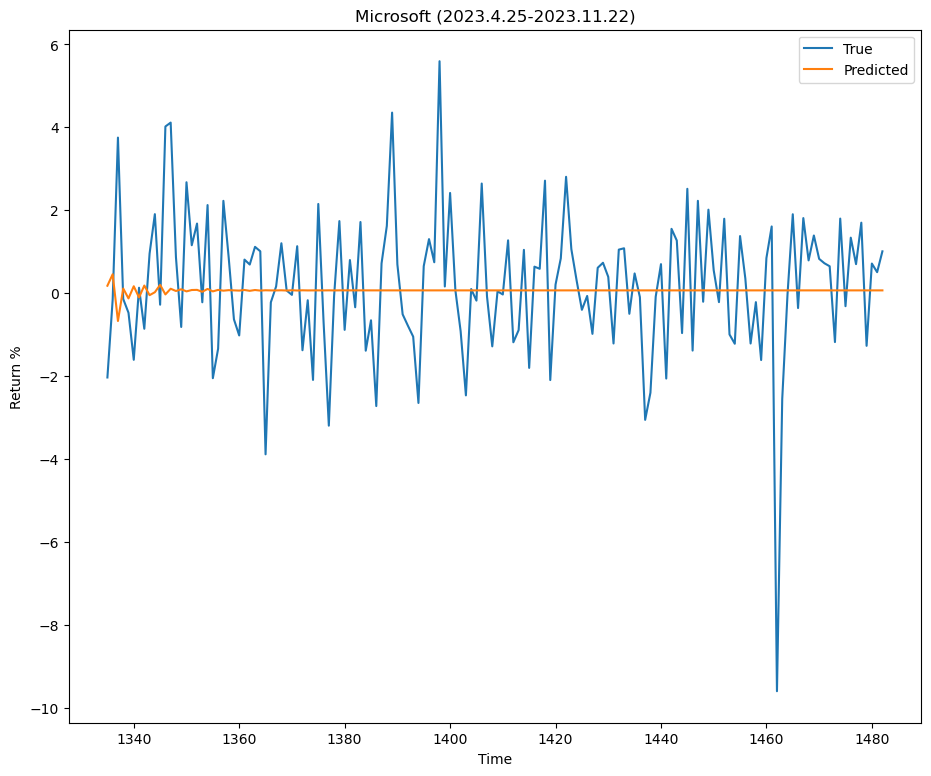

In [43]:
plt.plot(test['Microsoft'], label='True')
plt.plot(forecast['Microsoft'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Return %')
plt.title('Microsoft (2023.4.25-2023.11.22)')
plt.legend()
plt.show()

### Calculate the accuracy

In [44]:
def forecast_accuracy(forecast, actual):
    
    mse =np.mean((forecast - actual)**2)
    rmse = np.mean((forecast - actual)**2)**.5  

    return({'mse':mse,'rmse':rmse})

In [45]:
print('Forecast Accuracy of: Google')
accuracy_prod = forecast_accuracy(forecast['Google'], test['Google'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))


print('\nForecast Accuracy of: Microsoft')
accuracy_prod = forecast_accuracy(forecast['Microsoft'], test['Microsoft'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))


Forecast Accuracy of: Google
mse :  2.3794
rmse :  1.5425

Forecast Accuracy of: Microsoft
mse :  3.1068
rmse :  1.7626


## Rolling Forecast

In [46]:
rolling_predictions = pd.DataFrame()
test_size = 148

for i in range(test_size):
    train = data[:-(test_size-i)]  
    
    forecast_input = train.values[-9:]
    
    model = VAR(train)
    model_fitted = model.fit(9)
    pred = model_fitted.forecast(y=forecast_input, steps=1)
    forecast = pd.DataFrame(pred, columns=data.columns )
    rolling_predictions = rolling_predictions.append(forecast)

In [47]:
rolling_predictions.index = range(1335, 1483)
rolling_predictions

,Google,Microsoft
1335,0.227398,0.180424
1336,1.019844,0.746884
1337,-1.686676,-1.482449
1338,-0.609795,-0.698325
1339,0.517700,0.217980
...,...,...
1478,0.040915,0.121817
1479,-0.031826,0.124573
1480,0.052187,-0.087841
1481,0.203013,0.245151


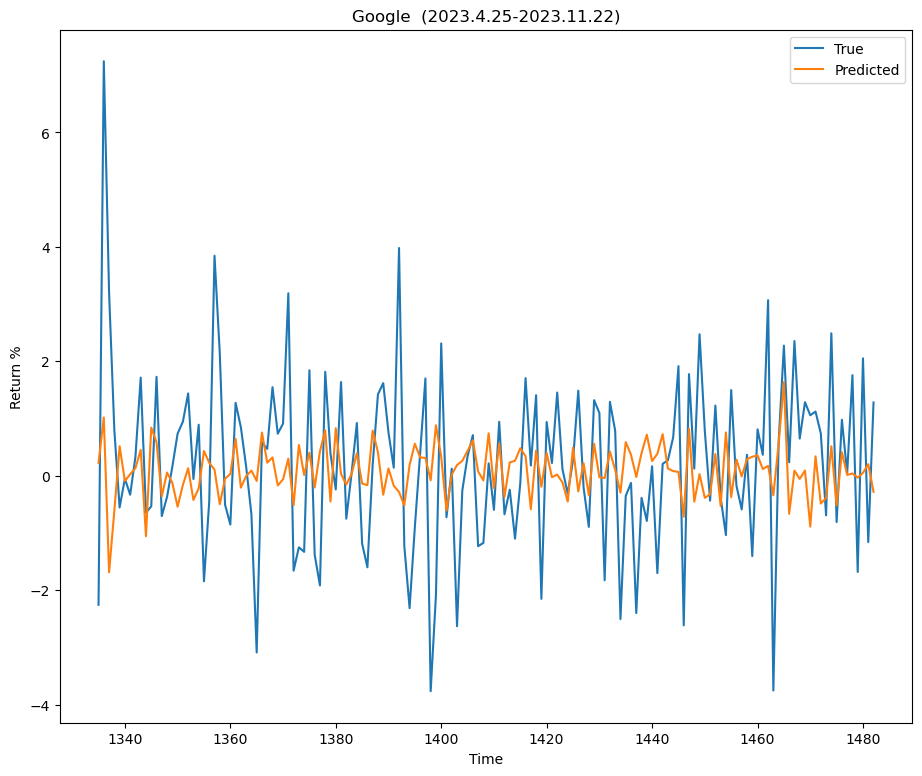

In [48]:
plt.plot(test['Google'], label='True')
plt.plot(rolling_predictions['Google'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Return %')
plt.title('Google  (2023.4.25-2023.11.22)')
plt.legend()
plt.show()

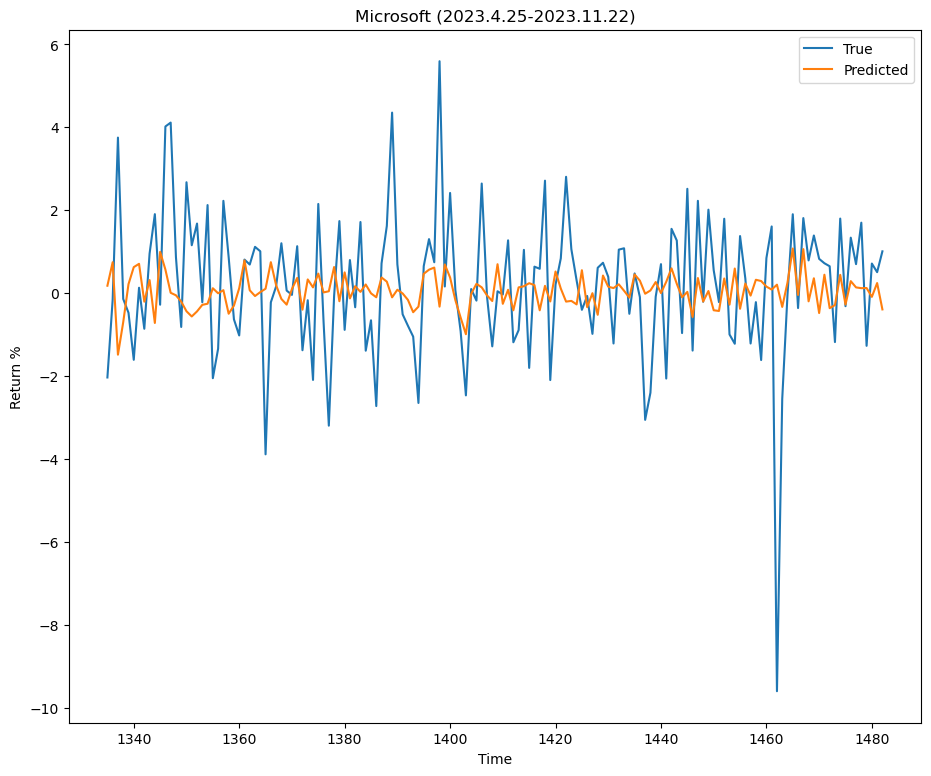

In [49]:
plt.plot(test['Microsoft'], label='True')
plt.plot(rolling_predictions['Microsoft'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Return %')
plt.title('Microsoft (2023.4.25-2023.11.22)')
plt.legend()
plt.show()

In [50]:
print('Rolling Forecast Accuracy of: Google')
accuracy_prod = forecast_accuracy(rolling_predictions['Google'], test['Google'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))


print('\n Rolling Forecast Accuracy of: Microsoft')
accuracy_prod = forecast_accuracy(rolling_predictions['Microsoft'], test['Microsoft'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

Rolling Forecast Accuracy of: Google
mse :  2.3784
rmse :  1.5422

 Rolling Forecast Accuracy of: Microsoft
mse :  3.1741
rmse :  1.7816
